# Zomato Sales Analysis

## Business Problem:
### Zomato has an average of 17.5 million monthly transacting customers for its food delivery business. Average monthly active food delivery restaurant partners on Zomato's platform have also increased by 8.7% year-on-year, from 2,08,000 to 2,26,000. You are working in a data-driven role at Zomato. You have a dataset of customers. As a data professional, you need to analyze the data, perform EDA (Exploratory Data Analysis) and visualization.

## Assumptions:
### 1. The dataset used represents a typical customer base and restaurant partners, with accurate data collection over the observed period.
### 2. Seasonal trends and offers significantly impact customer ordering behavior and restaurant partnerships.
### 3. Key metrics like order frequency, average order value, and delivery time are uniformly distributed across locations.

## Research Question:
### 1. How does the frequency of customer orders vary by time of day and day of the week?
### 2. What are the characteristics of high-performing restaurant partners in terms of customer ratings, order volume, and delivery time?
### 3. Which factors influence customer retention and repeat ordering patterns on the Zomato platform?

## Hypothesis:
### 1. Higher customer ratings for restaurants are positively correlated with an increased number of orders.
### 2. Restaurants offering discounts or participating in promotional campaigns have higher order volumes than those that do not.
### 3. Delivery time exceeding a specific threshold leads to a decrease in repeat orders from customers.

## Importing Libraries

In [1]:
import numpy as np                        # to perform numerical operations 
import pandas as pd                       # for the dataframe/datasets
import matplotlib.pyplot as plt           # for data visualization
import seaborn as sns                     # for data visualization
import warnings as wn                     # to ignore the warnings
wn.filterwarnings("ignore")

## Loading the Dataset

In [56]:
df = pd.read_csv("D:\Excel Syllabus\Zomato Data Analysis.csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## Exploratory Data Analysis and Data Cleaning

In [63]:
def rating(value):
    old = str(value).split("/")
    new = old[0]
    return float(new)
df["rate"] = df["rate"].apply(rating)

In [64]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Data Analysis and Visualization

### Q.1. What type of restaurant do the majority of customers order from?

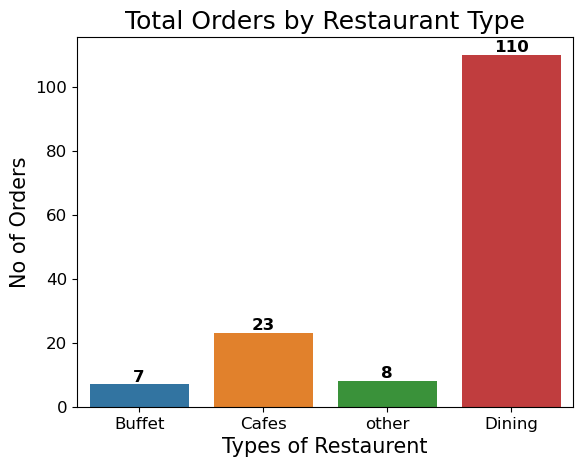

In [75]:
a = sns.countplot(x="listed_in(type)",data=df)
plt.title("Total Orders by Restaurant Type",fontsize=18)
plt.xlabel("Types of Restaurent",fontsize=15)
plt.ylabel("No of Orders",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for bars in a.containers:
    a.bar_label(bars,fontsize=12,weight="bold")
plt.show()

### Conclusion:- The majority of restaurants fall into the dining category.

### Q.2. How many votes has each type of restaurant received from customers?

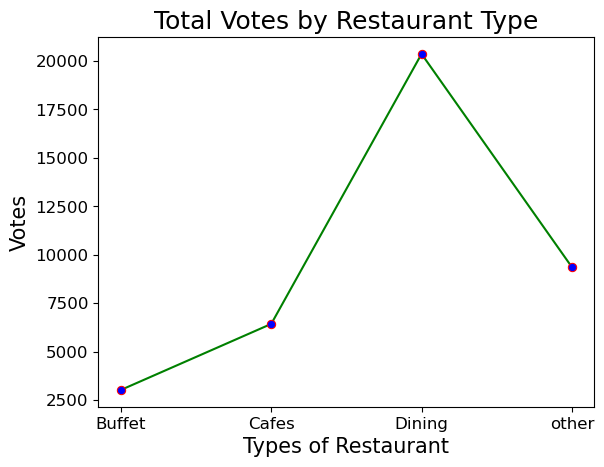

In [47]:
grouped_data = df.groupby("listed_in(type)")[["votes"]].sum()
result = grouped_data.reset_index()
sns.lineplot(x=result["listed_in(type)"],y=result["votes"],color="green",marker='o',markeredgecolor='red',markerfacecolor='blue')
plt.title("Total Votes by Restaurant Type",fontsize=18)
plt.xlabel("Types of Restaurant",fontsize=15)
plt.ylabel("Votes",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

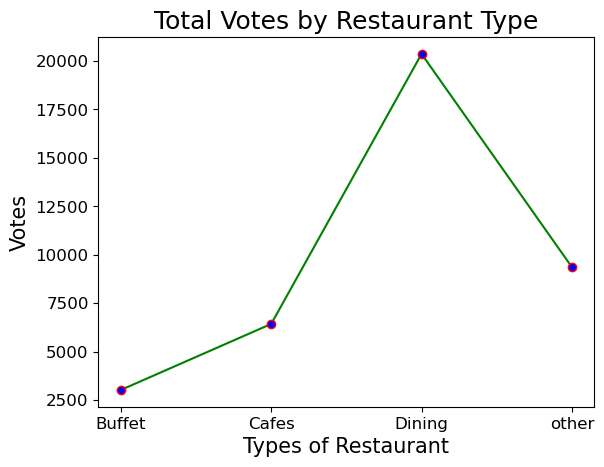

In [50]:
grouped_data = df.groupby("listed_in(type)")[["votes"]].sum()
result = grouped_data.reset_index()
plt.plot(result["listed_in(type)"],result["votes"],color="green",marker='o',markeredgecolor='red',markerfacecolor='blue')
plt.title("Total Votes by Restaurant Type",fontsize=18)
plt.xlabel("Types of Restaurant",fontsize=15)
plt.ylabel("Votes",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

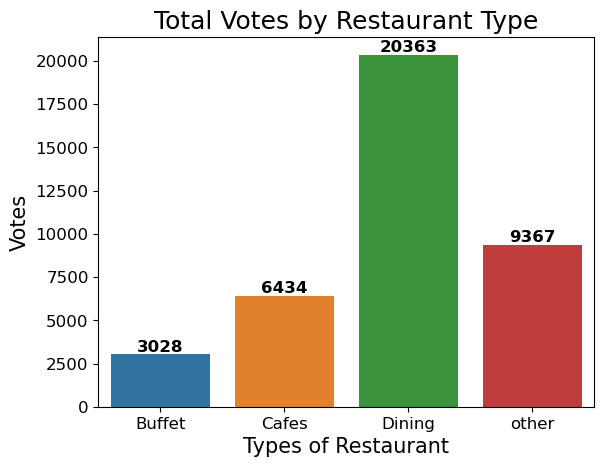

In [83]:
grouped_data = df.groupby("listed_in(type)")[["votes"]].sum()
result = grouped_data.reset_index()
c = sns.barplot(x="listed_in(type)",y="votes",data=result)
plt.title("Total Votes by Restaurant Type",fontsize=18)
plt.xlabel("Types of Restaurant",fontsize=15)
plt.ylabel("Votes",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for bars in c.containers:
    c.bar_label(bars,fontsize=12,weight="bold")
plt.show()

### Conclusion:- The dining restaurant has received the maximum votes.

### Q.3. What are the ratings that the majority of the restaurant have received?

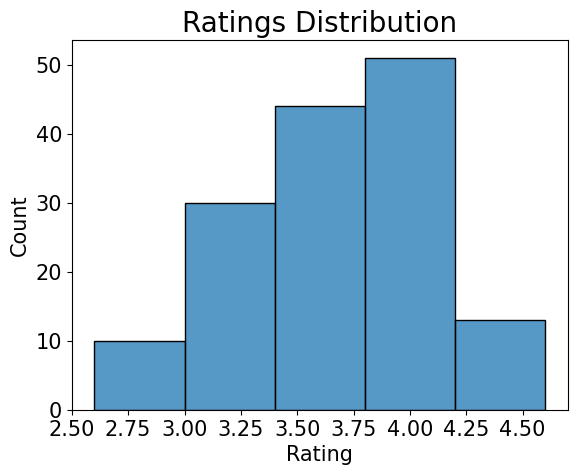

In [110]:
sns.histplot(x="rate",data=df,bins=5)
plt.title("Ratings Distribution",fontsize=20)
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Conclusion:- The majority restaurants received ratings from 3.5 to 4.

### Q.4. Zomato has observed that most couples order most of their food online. What is there average spending on each order?

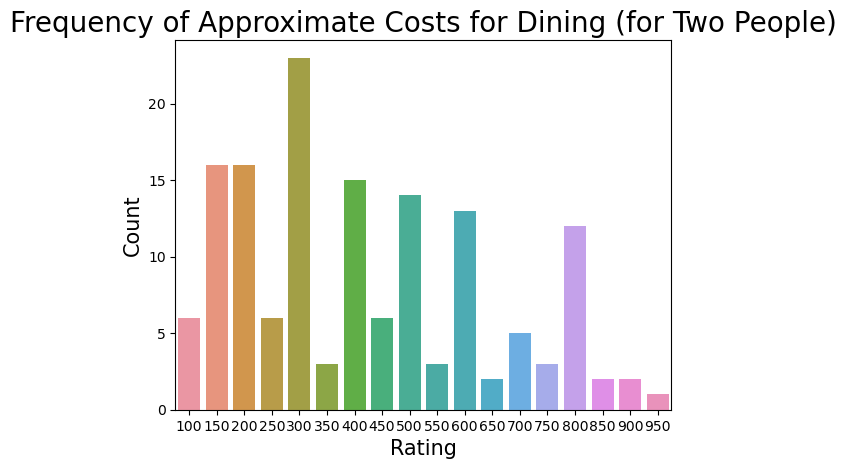

In [124]:
sns.countplot(x="approx_cost(for two people)",data=df)
plt.title("Frequency of Approximate Costs for Dining (for Two People)",fontsize=20)
plt.xlabel("Rating",fontsize=15)
plt.ylabel("Count",fontsize=15)
#plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.show()

### Conclusion:- The majority of couples prefer restaurants with an approximate cost of 300 rupees.

### Q.5. Which mode (online or offline) has received the maximum rating?

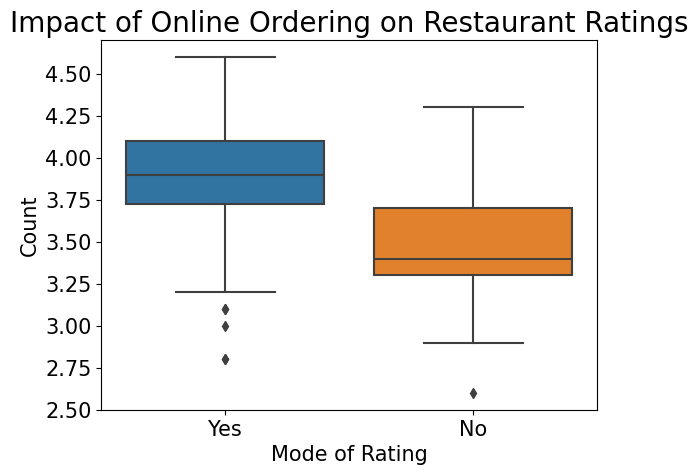

In [128]:
sns.boxplot(x="online_order",y="rate",data=df)
plt.title("Impact of Online Ordering on Restaurant Ratings",fontsize=20)
plt.xlabel("Mode of Rating",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Conclusion:- Offline orders received lower ratings in comparison to online orders.

### Q.6. Which type of restaurant recived more offline orders, so that Zomato can provide customers with some good efforts?

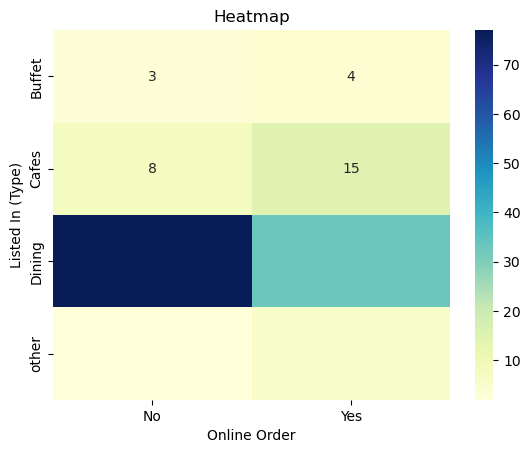

In [130]:
pivot_table = df.pivot_table(index="listed_in(type)",columns="online_order",aggfunc="size",fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt="d")
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

### Conclusion:- Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.